In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats
import gmaps

#Google devoloper Key 
from config import gkey

#Configure maps
gmaps.configure(api_key=gkey)

In [2]:
file = "clean.csv"

In [29]:
data_file = pd.read_csv(file)

In [30]:
data_file.head(20)

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,StateParcelId,ParcelSize,ValueofHome,YearBuilt,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
0,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,C15-000-035-4368-3,10890.0,360350.0,2001.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
1,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,C16-000-107-5040-4,2328.0,228680.0,2003.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
2,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,C51-000-535-8660-8,44.0,135000.0,1980.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
3,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,C62-000-778-7949-2,NaN,87660.0,1959.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
4,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,C21-000-189-4508-9,NaN,663090.0,1991.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN
5,1210339f620444e18,ARLINGTON,VA,634 EDGEWATER DR # 142,DUNEDIN,34698,C62-000-743-2905-3,NaN,298880.0,1974.0,...,316.0,1.38,0.19,28.00861,-82.79111,123.0,True,C,A:100,NaN
6,12103775b5d8e05f3,PETERSBURG,VA,576 BAYWOOD DR S,DUNEDIN,34698,C62-000-742-1078-2,7200.0,141668.0,1955.0,...,316.0,0.77,1.14,28.03237,-82.77399,123.0,True,C,A:100,NaN
7,12103a0c1d9b677e5,OTTO,NC,1836 AUDREY DR,CLEARWATER,33759,C62-000-762-5279-0,7771.0,161169.0,1957.0,...,NaN,1.28,0.73,27.97858,-82.72171,123.0,True,B,X:100,NaN
8,120113a35cc333fa2,CANTON,NC,4548 SW 34 TER,DANIA BEACH,33312,C16-000-101-4554-8,11375.0,302070.0,1958.0,...,288.0,1.23,4.58,26.09441,-80.12455,140.0,True,HVHZ,"X500:80, A:20",NaN
9,12011843ab49896c9,HUNTERSVILLE,NC,3481 NW 1 ST,LAUDERHILL,33311,C16-000-098-4173-5,7572.0,122040.0,1954.0,...,551.0,0.78,4.69,26.09441,-80.12455,140.0,True,HVHZ,X500:100,NaN


In [31]:
data_file[['PropertyCity','ValueofHome']].head(20)

,PropertyCity,ValueofHome
0,MELBOURNE,360350.0
1,MIRAMAR,228680.0
2,BRADENTON,135000.0
3,SAINT PETERSBURG,87660.0
4,NAPLES,663090.0
5,DUNEDIN,298880.0
6,DUNEDIN,141668.0
7,CLEARWATER,161169.0
8,DANIA BEACH,302070.0
9,LAUDERHILL,122040.0


In [21]:
summary = data_file.describe()
summary.loc['mean']

PropertyZip                  33531.180000
ParcelSize                    9306.410256
ValueofHome                 218794.360000
YearBuilt                     1982.720000
NumberOfStories                  1.095238
AdjSquareFeet                 1821.980000
BCEG                            56.500000
DistancetoCoast                126.720000
PoliceID                       618.062500
Crime                                 NaN
FireID                         335.761905
DistancetoFireDepartment         1.201000
DistancetoSinkhole               5.803800
SinkholeLatitude                27.271869
SinkholeLongitude              -81.358533
LocationWindSpeed              129.160000
FloodZoneRiskLevel                    NaN
Name: mean, dtype: float64

In [22]:
data_file[['ParcelSize','AdjSquareFeet']].head(20)

,ParcelSize,AdjSquareFeet
0,10890.0,3716.0
1,2328.0,1633.0
2,44.0,1254.0
3,NaN,445.0
4,NaN,1263.0
5,NaN,1670.0
6,7200.0,1212.0
7,7771.0,1270.0
8,11375.0,1706.0
9,7572.0,1176.0


In [23]:
data_file[['AdjSquareFeet', 'Pool']].head(40)

,AdjSquareFeet,Pool
0,3716.0,NaN
1,1633.0,NaN
2,1254.0,NaN
3,445.0,NaN
4,1263.0,NaN
5,1670.0,NaN
6,1212.0,NaN
7,1270.0,NaN
8,1706.0,NaN
9,1176.0,NaN


In [24]:
data_file[['AdjSquareFeet','ValueofHome']].head(20)

,AdjSquareFeet,ValueofHome
0,3716.0,360350.0
1,1633.0,228680.0
2,1254.0,135000.0
3,445.0,87660.0
4,1263.0,663090.0
5,1670.0,298880.0
6,1212.0,141668.0
7,1270.0,161169.0
8,1706.0,302070.0
9,1176.0,122040.0


In [25]:
data_file[['NumberOfStories', 'ValueofHome']].head(50)

,NumberOfStories,ValueofHome
0,2.0,360350.0
1,NaN,228680.0
2,NaN,135000.0
3,1.0,87660.0
4,NaN,663090.0
5,1.0,298880.0
6,1.0,141668.0
7,1.0,161169.0
8,1.0,302070.0
9,1.0,122040.0


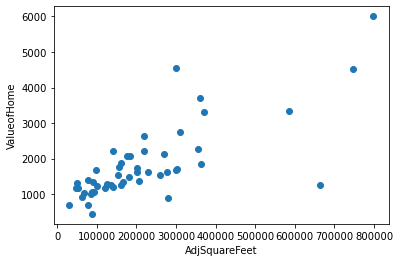

In [26]:
ValueofHome = data_file.ValueofHome
AdjSquareFeet = data_file.AdjSquareFeet
plt.scatter(ValueofHome, AdjSquareFeet)
plt.xlabel('AdjSquareFeet')
plt.ylabel('ValueofHome')
plt.show()

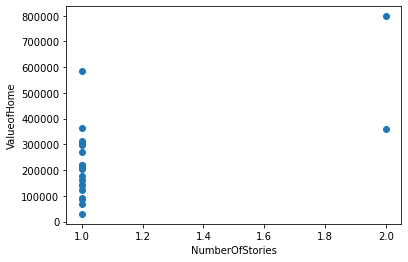

In [27]:
ValueofHome = data_file.ValueofHome
NumberOfStories = data_file.NumberOfStories
plt.scatter(NumberOfStories, ValueofHome)
plt.xlabel('NumberOfStories')
plt.ylabel('ValueofHome')
plt.show()

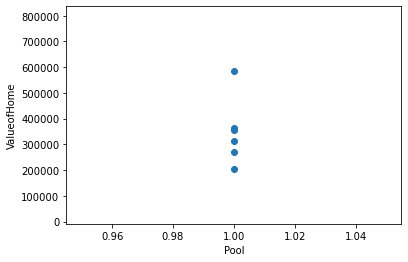

In [28]:
ValueofHome = data_file.ValueofHome
Pool = data_file.Pool
plt.scatter(Pool, ValueofHome)
plt.xlabel('Pool')
plt.ylabel('ValueofHome')
plt.show()